In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 4)

## a)

In [2]:
price = pd.read_excel("C:/Users/zheng/OneDrive/Documents/Winter 2024/APM466/bond_data.xlsx", sheet_name='Sheet1')
info = pd.read_excel("C:/Users/zheng/OneDrive/Documents/Winter 2024/APM466/bond_data.xlsx", sheet_name='Sheet2')

In [3]:
price = price.dropna(axis=0)
price.reset_index(inplace=True)
price.drop(['index'], axis=1, inplace=True)
price['Date'] = price["Date"].dt.strftime('%Y-%m-%d')

In [4]:
price

,Date,CA135087J546,CA135087J967,CA135087K528,CA135087K940,CA135087L518,CA135087L930,CA135087M847,CA135087N837,CA135087P576,CA135087Q491,CA135087Q988
0,2024-01-08,99.630,97.960,96.460,94.34,92.862,93.46,93.280,97.580,100.500,99.74,103.406
1,2024-01-09,99.640,97.980,96.482,94.37,92.860,93.44,93.301,97.591,100.480,99.72,103.380
2,2024-01-10,99.650,97.985,96.552,94.38,92.844,93.55,93.245,97.603,100.439,99.72,103.279
3,2024-01-11,99.661,97.982,96.576,94.43,92.856,93.53,93.186,97.520,100.328,99.55,103.132
4,2024-01-12,99.670,98.021,96.661,94.49,93.023,93.60,93.467,97.740,100.637,99.88,103.542
5,2024-01-15,99.687,98.054,96.715,94.49,93.008,93.57,93.493,97.770,100.673,99.91,103.552
6,2024-01-16,99.680,97.974,96.540,94.42,92.796,93.40,93.141,97.441,100.220,99.44,102.974
7,2024-01-17,99.683,97.975,96.448,94.25,92.570,93.12,92.856,97.092,99.834,98.99,102.483
8,2024-01-18,99.708,97.999,96.495,94.24,92.546,93.08,92.753,96.956,99.662,98.81,102.279
9,2024-01-19,99.720,98.007,96.460,94.22,92.545,93.07,92.764,96.947,99.623,98.77,102.242


In [5]:
info

,ISIN,Coupon,Maturity Date,Issue Date
0,CA135087J546,2.25,2024-03-01,2018-10-05
1,CA135087J967,1.50,2024-09-01,2019-04-05
2,CA135087K528,1.25,2025-03-01,2019-10-11
3,CA135087K940,0.50,2025-09-01,2020-04-03
4,CA135087L518,0.25,2026-03-01,2020-10-09
5,CA135087L930,1.00,2026-09-01,2021-04-16
6,CA135087M847,1.25,2027-03-01,2021-10-15
7,CA135087N837,2.75,2027-09-01,2022-05-13
8,CA135087P576,3.50,2028-03-01,2022-10-21
9,CA135087Q491,3.25,2028-09-01,2023-04-21


In [6]:
def approx_ytm(price, period, coupon):
    """
    Return the approximated YTM of a bond given it's price, period until maturity and the coupon.
    It is assumed that all bonds have a face value of 100 (CAD)
    """
    if period > 0:
        ytm =  2 * (coupon/2 + (100-price)/period) / ((100+price)/2) 
    else:
        ytm = (100-price)/price
    return ytm

In [7]:
ytms = pd.DataFrame()
for i in range(11):
    yields = approx_ytm(price.iloc[:,i+1], i, info['Coupon'][i])
    ytms[i] = yields
ytms

,0,1,2,3,4,5,6,7,8,9,10
0,0.003714,0.056375,0.048763,0.043978,0.039603,0.037382,0.036113,0.034836,0.033666,0.033121,0.032632
1,0.003613,0.055965,0.048534,0.043765,0.039614,0.037469,0.036037,0.034802,0.033719,0.033169,0.032688
2,0.003512,0.055863,0.047804,0.043694,0.039700,0.036993,0.036241,0.034765,0.033828,0.033169,0.032903
3,0.003402,0.055924,0.047554,0.043340,0.039636,0.037080,0.036455,0.035020,0.034124,0.033576,0.033216
4,0.003311,0.055125,0.046669,0.042916,0.038736,0.036777,0.035434,0.034345,0.033301,0.032786,0.032343
5,0.003140,0.054450,0.046107,0.042916,0.038817,0.036907,0.035340,0.034253,0.033206,0.032715,0.032322
6,0.003210,0.056088,0.047929,0.043411,0.039959,0.037642,0.036619,0.035263,0.034412,0.033839,0.033553
7,0.003180,0.056068,0.048888,0.044616,0.041180,0.038857,0.037658,0.036337,0.035444,0.034921,0.034604
8,0.002929,0.055576,0.048398,0.044687,0.041310,0.039030,0.038035,0.036757,0.035906,0.035355,0.035043
9,0.002808,0.055412,0.048763,0.044829,0.041315,0.039074,0.037995,0.036784,0.036010,0.035451,0.035122


In [8]:
ytms.set_index(price['Date'], inplace=True)
ytms

,0,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2024-01-08,0.003714,0.056375,0.048763,0.043978,0.039603,0.037382,0.036113,0.034836,0.033666,0.033121,0.032632
2024-01-09,0.003613,0.055965,0.048534,0.043765,0.039614,0.037469,0.036037,0.034802,0.033719,0.033169,0.032688
2024-01-10,0.003512,0.055863,0.047804,0.043694,0.039700,0.036993,0.036241,0.034765,0.033828,0.033169,0.032903
2024-01-11,0.003402,0.055924,0.047554,0.043340,0.039636,0.037080,0.036455,0.035020,0.034124,0.033576,0.033216
2024-01-12,0.003311,0.055125,0.046669,0.042916,0.038736,0.036777,0.035434,0.034345,0.033301,0.032786,0.032343
2024-01-15,0.003140,0.054450,0.046107,0.042916,0.038817,0.036907,0.035340,0.034253,0.033206,0.032715,0.032322
2024-01-16,0.003210,0.056088,0.047929,0.043411,0.039959,0.037642,0.036619,0.035263,0.034412,0.033839,0.033553
2024-01-17,0.003180,0.056068,0.048888,0.044616,0.041180,0.038857,0.037658,0.036337,0.035444,0.034921,0.034604
2024-01-18,0.002929,0.055576,0.048398,0.044687,0.041310,0.039030,0.038035,0.036757,0.035906,0.035355,0.035043


In [9]:
ytms.columns = ytms.columns*6
ytms

,0,6,12,18,24,30,36,42,48,54,60
Date,,,,,,,,,,,
2024-01-08,0.003714,0.056375,0.048763,0.043978,0.039603,0.037382,0.036113,0.034836,0.033666,0.033121,0.032632
2024-01-09,0.003613,0.055965,0.048534,0.043765,0.039614,0.037469,0.036037,0.034802,0.033719,0.033169,0.032688
2024-01-10,0.003512,0.055863,0.047804,0.043694,0.039700,0.036993,0.036241,0.034765,0.033828,0.033169,0.032903
2024-01-11,0.003402,0.055924,0.047554,0.043340,0.039636,0.037080,0.036455,0.035020,0.034124,0.033576,0.033216
2024-01-12,0.003311,0.055125,0.046669,0.042916,0.038736,0.036777,0.035434,0.034345,0.033301,0.032786,0.032343
2024-01-15,0.003140,0.054450,0.046107,0.042916,0.038817,0.036907,0.035340,0.034253,0.033206,0.032715,0.032322
2024-01-16,0.003210,0.056088,0.047929,0.043411,0.039959,0.037642,0.036619,0.035263,0.034412,0.033839,0.033553
2024-01-17,0.003180,0.056068,0.048888,0.044616,0.041180,0.038857,0.037658,0.036337,0.035444,0.034921,0.034604
2024-01-18,0.002929,0.055576,0.048398,0.044687,0.041310,0.039030,0.038035,0.036757,0.035906,0.035355,0.035043


In [10]:
# Perform cublic spline interploation on data for plots
ytms_fills = ytms
for i in range(len(ytms.columns)-1):
    fills = pd.DataFrame(np.nan, index=price['Date'], columns=[i for i in range(ytms.columns[i] + 1, ytms.columns[i+1])])
    ytms_fills = pd.concat([ytms_fills, fills], axis=1)
ytms_fills.sort_index(axis=1, inplace=True)
ytms_fills = ytms_fills.interpolate(method='cubicspline', axis=1) 

In [11]:
ytms_fills = ytms_fills * 100

In [12]:
ytms_fills

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-08,0.371374,2.011419,3.296515,4.264166,4.951878,5.397156,5.637503,5.710424,5.653424,5.504009,...,3.333125,3.325275,3.318397,3.312083,3.305927,3.299519,3.292453,3.284320,3.274714,3.263227
2024-01-09,0.361301,1.988635,3.264649,4.226394,4.910922,5.355282,5.596525,5.671702,5.617864,5.472061,...,3.338984,3.330859,3.323598,3.316866,3.310326,3.303643,3.296481,3.288503,3.279374,3.268758
2024-01-10,0.351229,1.995381,3.279656,4.242469,4.922234,5.357367,5.586282,5.647393,5.579116,5.419865,...,3.347494,3.336508,3.326236,3.316866,3.308589,3.301596,3.296075,3.292219,3.290216,3.290256
2024-01-11,0.340153,1.993765,3.284394,4.250808,4.931773,5.366057,5.592428,5.649651,5.576494,5.411725,...,3.382934,3.373988,3.365521,3.357554,3.350113,3.343218,3.336895,3.331166,3.326055,3.321584
2024-01-12,0.331093,1.971412,3.248933,4.202731,4.871882,5.295462,5.512547,5.562213,5.483535,5.315591,...,3.298633,3.291167,3.284621,3.278634,3.272847,3.266900,3.260434,3.253089,3.244504,3.234320
2024-01-15,0.313983,1.942235,3.209059,4.153600,4.815003,5.232415,5.444980,5.491843,5.412151,5.245048,...,3.289629,3.282666,3.276741,3.271472,3.266476,3.261371,3.255773,3.249299,3.241568,3.232196
2024-01-16,0.321027,1.977893,3.273375,4.245841,4.933659,5.375195,5.608817,5.672893,5.605788,5.445871,...,3.410228,3.400816,3.392015,3.383919,3.376620,3.370210,3.364781,3.360426,3.357237,3.355307
2024-01-17,0.318008,1.958515,3.245671,4.216774,4.909125,5.360023,5.606769,5.686661,5.637001,5.495087,...,3.514977,3.506683,3.499068,3.492079,3.485667,3.479778,3.474362,3.469368,3.464744,3.460439
2024-01-18,0.292855,1.931083,3.214775,4.181602,4.869236,5.315346,5.557604,5.633680,5.581246,5.437972,...,3.560421,3.551492,3.543169,3.535481,3.528456,3.522122,3.516509,3.511643,3.507554,3.504269


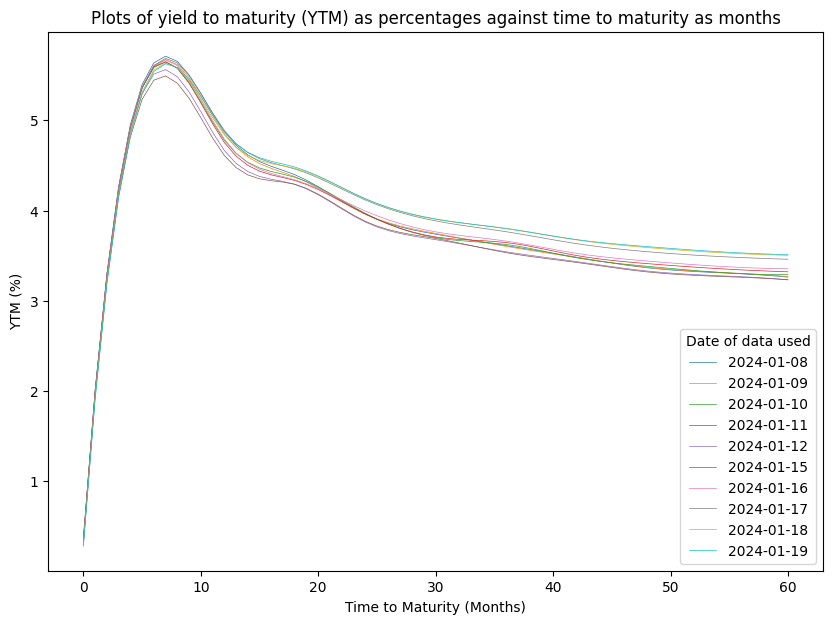

In [46]:
fig, ax = plt.subplots()
ytms_fills.T.plot(title='Plots of yield to maturity (YTM) as percentages against time to maturity as months',
                  xlabel='Time to Maturity (Months)', ylabel= 'YTM (%)', 
                  lw=0.5, figsize=(10,7),
                  ax=ax).figure.savefig('ytms.jpg', dpi=300)
ax.legend(title='Date of data used')

## b)

In [14]:
def bootstrap_spot(prices, coupons):
    """
    Return the bootstrapped 1-5 year spot curve given coupon bonds' prices, periods until maturity and their coupons.
    It is assumed that all bonds have a face value of 100 (CAD)
    """
    spot_rates = [2*(((100 + coupons[0]/2) / prices[0]) - 1)] # start with half year spot rate
    for i in range(1, len(prices)): # for each bond starting from 1-year
        price = prices[i]
        coupon = 0.5 * coupons[i]
        discounted = []
        for j in range(len(spot_rates)):
            discounted.append(coupon/((1 + spot_rates[j]/2) ** (j+1)))
        for cashflow in discounted:
            price -= cashflow
        spot = 2 * (pow(((100+coupon)/price), (1/(i+1))) - 1)
        spot_rates.append(spot)
    return spot_rates
    

In [15]:
price.T

,0,1,2,3,4,5,6,7,8,9
Date,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
CA135087J546,99.63,99.64,99.65,99.661,99.67,99.687,99.68,99.683,99.708,99.72
CA135087J967,97.96,97.98,97.985,97.982,98.021,98.054,97.974,97.975,97.999,98.007
CA135087K528,96.46,96.482,96.552,96.576,96.661,96.715,96.54,96.448,96.495,96.46
CA135087K940,94.34,94.37,94.38,94.43,94.49,94.49,94.42,94.25,94.24,94.22
CA135087L518,92.862,92.86,92.844,92.856,93.023,93.008,92.796,92.57,92.546,92.545
CA135087L930,93.46,93.44,93.55,93.53,93.6,93.57,93.4,93.12,93.08,93.07
CA135087M847,93.28,93.301,93.245,93.186,93.467,93.493,93.141,92.856,92.753,92.764
CA135087N837,97.58,97.591,97.603,97.52,97.74,97.77,97.441,97.092,96.956,96.947
CA135087P576,100.5,100.48,100.439,100.328,100.637,100.673,100.22,99.834,99.662,99.623


In [16]:
spot_rates = pd.DataFrame()
for i in range(10):   
    rates = bootstrap_spot(price.T[i][2:], list(info['Coupon'][1:]))
    spot_rates[i] = rates 
spot_rates

,0,1,2,3,4,5,6,7,8,9
0,0.056962,0.056542,0.056437,0.056500,0.055682,0.054990,0.056668,0.056647,0.056143,0.055976
1,0.049187,0.048954,0.048206,0.047950,0.047046,0.046473,0.048334,0.049317,0.048816,0.049190
2,0.044403,0.044186,0.044115,0.043752,0.043320,0.043321,0.043824,0.045057,0.045131,0.045276
3,0.039976,0.039988,0.040076,0.040011,0.039092,0.039175,0.040341,0.041589,0.041722,0.041727
4,0.037581,0.037672,0.037184,0.037275,0.036971,0.037106,0.037851,0.039089,0.039269,0.039313
5,0.036247,0.036169,0.036383,0.036607,0.035561,0.035465,0.036770,0.037827,0.038216,0.038173
6,0.034657,0.034624,0.034591,0.034859,0.034179,0.034085,0.035102,0.036189,0.036627,0.036654
7,0.033299,0.033360,0.033483,0.033796,0.032960,0.032863,0.034087,0.035125,0.035608,0.035718
8,0.032799,0.032853,0.032857,0.033287,0.032487,0.032416,0.033552,0.034644,0.035095,0.035195
9,0.032150,0.032213,0.032453,0.032781,0.031892,0.031876,0.033125,0.034181,0.034637,0.034718


In [17]:
spot_rates.columns = price["Date"]
spot_rates

Date,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
0,0.056962,0.056542,0.056437,0.056500,0.055682,0.054990,0.056668,0.056647,0.056143,0.055976
1,0.049187,0.048954,0.048206,0.047950,0.047046,0.046473,0.048334,0.049317,0.048816,0.049190
2,0.044403,0.044186,0.044115,0.043752,0.043320,0.043321,0.043824,0.045057,0.045131,0.045276
3,0.039976,0.039988,0.040076,0.040011,0.039092,0.039175,0.040341,0.041589,0.041722,0.041727
4,0.037581,0.037672,0.037184,0.037275,0.036971,0.037106,0.037851,0.039089,0.039269,0.039313
5,0.036247,0.036169,0.036383,0.036607,0.035561,0.035465,0.036770,0.037827,0.038216,0.038173
6,0.034657,0.034624,0.034591,0.034859,0.034179,0.034085,0.035102,0.036189,0.036627,0.036654
7,0.033299,0.033360,0.033483,0.033796,0.032960,0.032863,0.034087,0.035125,0.035608,0.035718
8,0.032799,0.032853,0.032857,0.033287,0.032487,0.032416,0.033552,0.034644,0.035095,0.035195
9,0.032150,0.032213,0.032453,0.032781,0.031892,0.031876,0.033125,0.034181,0.034637,0.034718


In [18]:
spot_rates = spot_rates * 100

In [19]:
spot_rates.index = np.arange(1, len(spot_rates) + 1)

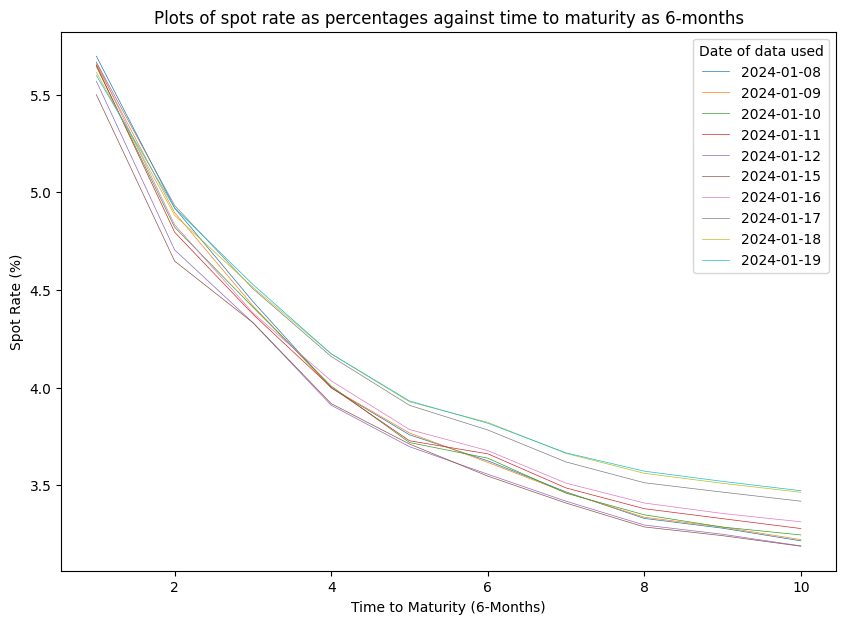

In [47]:
fig, ax = plt.subplots()
spot_rates.plot(title='Plots of spot rate as percentages against time to maturity as 6-months',
                xlabel='Time to Maturity (6-Months)', ylabel= 'Spot Rate (%)', 
                lw=0.5, figsize=(10,7),
                ax=ax).figure.savefig('spot_rates.jpg', dpi=300)
ax.legend(title='Date of data used')

## c)

In [21]:
spot_rates

Date,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
1,5.696203,5.654215,5.643721,5.650017,5.568195,5.499011,5.666810,5.664710,5.614343,5.597559
2,4.918730,4.895350,4.820625,4.794992,4.704616,4.647317,4.833362,4.931658,4.881586,4.919042
3,4.440289,4.418588,4.411466,4.375234,4.331967,4.332124,4.382407,4.505681,4.513080,4.527575
4,3.997609,3.998761,4.007642,4.001073,3.909225,3.917536,4.034132,4.158853,4.172181,4.172702
5,3.758128,3.767185,3.718404,3.727479,3.697144,3.710631,3.785079,3.908936,3.926902,3.931269
6,3.624653,3.616881,3.638335,3.660663,3.556145,3.546498,3.677024,3.782676,3.821595,3.817299
7,3.465651,3.462404,3.459060,3.485921,3.417902,3.408515,3.510229,3.618880,3.662686,3.665412
8,3.329899,3.335998,3.348345,3.379642,3.296023,3.286251,3.408719,3.512518,3.560798,3.571758
9,3.279910,3.285302,3.285670,3.328689,3.248720,3.241552,3.355151,3.464414,3.509495,3.519518
10,3.215014,3.221267,3.245298,3.278092,3.189183,3.187579,3.312544,3.418128,3.463666,3.471816


In [22]:
def forward_rate_1y(spot_rates):
    """
    Return the 1 year forward rates given a list of spot rates
    """
    base_rate = spot_rates[0] / 2
    base_period = 2
    forward_rates = []
    for i in range(1, len(spot_rates)):
        semi_annual_rate = spot_rates[i] / 2
        period_diff = i
        frac = ((1 + semi_annual_rate) ** (base_period + period_diff)) / ((1 + base_rate) ** base_period)
        forward_rate = frac ** (1/period_diff) - 1
        forward_rates.append(forward_rate)
    return forward_rates

In [23]:
forward_rates= pd.DataFrame()
for i in range(10):
    forward_rates[i] = forward_rate_1y(list(spot_rates.iloc[:,i])[1:])
forward_rates
# spot_rates.iloc[:,0]

,0,1,2,3,4,5,6,7,8,9
0,1.790187,1.780839,1.832655,1.805954,1.823828,1.872933,1.783906,1.865327,1.917105,1.904916
1,1.599561,1.609377,1.645781,1.649958,1.604097,1.633938,1.664190,1.736103,1.767953,1.753434
2,1.547346,1.559797,1.542213,1.555347,1.555540,1.580354,1.588586,1.656200,1.682608,1.676201
3,1.535715,1.534747,1.563210,1.583310,1.528969,1.533233,1.587223,1.640856,1.677248,1.667037
4,1.486899,1.488197,1.496924,1.517931,1.487620,1.490123,1.527864,1.583121,1.618943,1.615024
5,1.442980,1.449470,1.465970,1.488350,1.447815,1.448790,1.501599,1.553628,1.589743,1.591857
6,1.443733,1.449309,1.457167,1.485581,1.447069,1.448770,1.497441,1.552708,1.585166,1.587199
7,1.429588,1.435291,1.455991,1.477530,1.433606,1.437891,1.494248,1.547254,1.578713,1.580019


In [24]:
forward_rates.columns = price['Date']
forward_rates

Date,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
0,1.790187,1.780839,1.832655,1.805954,1.823828,1.872933,1.783906,1.865327,1.917105,1.904916
1,1.599561,1.609377,1.645781,1.649958,1.604097,1.633938,1.664190,1.736103,1.767953,1.753434
2,1.547346,1.559797,1.542213,1.555347,1.555540,1.580354,1.588586,1.656200,1.682608,1.676201
3,1.535715,1.534747,1.563210,1.583310,1.528969,1.533233,1.587223,1.640856,1.677248,1.667037
4,1.486899,1.488197,1.496924,1.517931,1.487620,1.490123,1.527864,1.583121,1.618943,1.615024
5,1.442980,1.449470,1.465970,1.488350,1.447815,1.448790,1.501599,1.553628,1.589743,1.591857
6,1.443733,1.449309,1.457167,1.485581,1.447069,1.448770,1.497441,1.552708,1.585166,1.587199
7,1.429588,1.435291,1.455991,1.477530,1.433606,1.437891,1.494248,1.547254,1.578713,1.580019


In [25]:
forward_rates.index = np.arange(1, len(forward_rates) + 1)

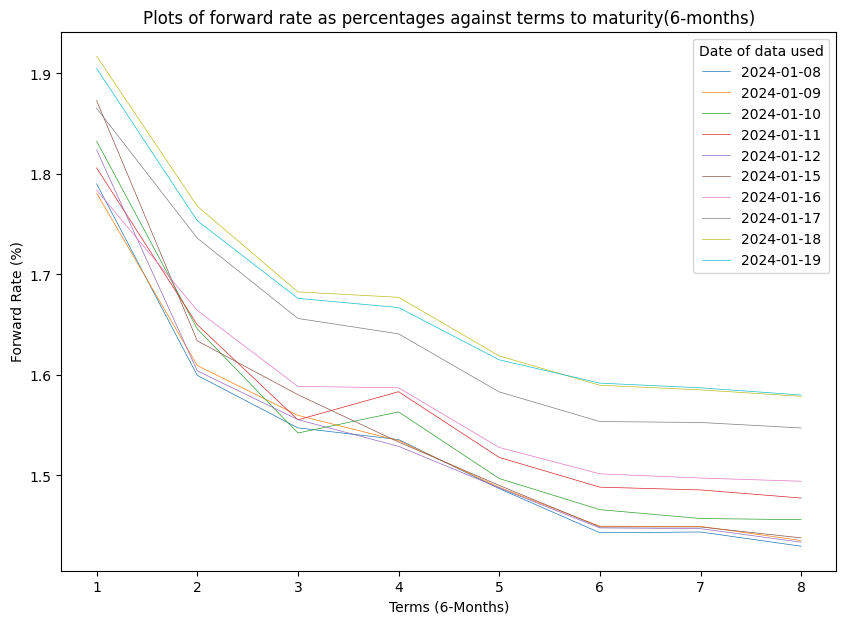

In [48]:
fig, ax = plt.subplots()
forward_rates.plot(title='Plots of forward rate as percentages against terms to maturity(6-months)',
                   xlabel='Terms (6-Months)', ylabel= 'Forward Rate (%)', 
                   lw=0.5, figsize=(10,7),
                   ax=ax).figure.savefig('forward_rate.jpg', dpi=300)
ax.legend(title='Date of data used')

# Question 5

In [27]:
ytms = ytms * 100
ytms

,0,6,12,18,24,30,36,42,48,54,60
Date,,,,,,,,,,,
2024-01-08,0.371374,5.637503,4.876311,4.397791,3.960345,3.738240,3.611341,3.483580,3.366584,3.312083,3.263227
2024-01-09,0.361301,5.596525,4.853371,4.376533,3.961423,3.746898,3.603706,3.480205,3.371907,3.316866,3.268758
2024-01-10,0.351229,5.586282,4.780414,4.369448,3.970048,3.699303,3.624070,3.476523,3.382825,3.316866,3.290256
2024-01-11,0.340153,5.592428,4.755413,4.334036,3.963579,3.707952,3.645537,3.501996,3.412404,3.357554,3.321584
2024-01-12,0.331093,5.512547,4.666914,4.291566,3.873632,3.677686,3.543412,3.434524,3.330143,3.278634,3.234320
2024-01-15,0.313983,5.444980,4.610731,4.291566,3.881704,3.690655,3.533978,3.425335,3.320576,3.271472,3.232196
2024-01-16,0.321027,5.608817,4.792917,4.341117,3.995934,3.764219,3.661919,3.526261,3.441215,3.383919,3.355307
2024-01-17,0.318008,5.606769,4.888826,4.461604,4.117983,3.885667,3.765849,3.633691,3.544442,3.492079,3.460439
2024-01-18,0.292855,5.557604,4.839818,4.468699,4.130961,3.903045,3.803486,3.675658,3.590568,3.535481,3.504269


In [28]:
ytm_log_returns = pd.DataFrame()
for i in range(11):
    ytm_log_returns[i*6] = np.diff(np.log(ytms[i*6]))
ytm_log_returns

,0,6,12,18,24,30,36,42,48,54,60
0,-0.027499,-0.007295,-0.004715,-0.004846,0.000272,0.002313,-0.002116,-0.000969,0.001580,0.001443,0.001693
1,-0.028271,-0.001832,-0.015146,-0.001620,0.002175,-0.012784,0.005635,-0.001058,0.003232,0.000000,0.006555
2,-0.032043,0.001100,-0.005244,-0.008137,-0.001631,0.002335,0.005906,0.007300,0.008706,0.012193,0.009476
3,-0.026998,-0.014387,-0.018785,-0.009848,-0.022955,-0.008196,-0.028413,-0.019455,-0.024402,-0.023786,-0.026623
4,-0.053060,-0.012333,-0.012112,0.000000,0.002082,0.003520,-0.002666,-0.002679,-0.002877,-0.002187,-0.000657
5,0.022188,0.029646,0.038753,0.011480,0.029003,0.019737,0.035563,0.029039,0.035686,0.033795,0.037381
6,-0.009449,-0.000365,0.019813,0.027377,0.030086,0.031754,0.027986,0.030011,0.029556,0.031463,0.030852
7,-0.082399,-0.008807,-0.010075,0.001589,0.003147,0.004462,0.009945,0.011483,0.012930,0.012352,0.012587
8,-0.042085,-0.002953,0.007512,0.003170,0.000131,0.001113,-0.001058,0.000756,0.002912,0.002727,0.002269


In [31]:
ytm_log_returns_cov = ytm_log_returns.cov()
ytm_log_returns_cov

,0,6,12,18,24,30,36,42,48,54,60
0,0.000823,0.000279,0.000383,0.000129,0.000238,0.000169,0.000243,0.000195,0.000227,0.000220,0.000238
6,0.000279,0.000169,0.000211,0.000064,0.000150,0.000087,0.000189,0.000148,0.000179,0.000172,0.000187
12,0.000383,0.000211,0.000354,0.000159,0.000259,0.000205,0.000286,0.000249,0.000281,0.000279,0.000288
18,0.000129,0.000064,0.000159,0.000130,0.000163,0.000135,0.000164,0.000150,0.000158,0.000158,0.000164
24,0.000238,0.000150,0.000259,0.000163,0.000262,0.000187,0.000289,0.000244,0.000275,0.000271,0.000289
30,0.000169,0.000087,0.000205,0.000135,0.000187,0.000182,0.000193,0.000186,0.000193,0.000201,0.000197
36,0.000243,0.000189,0.000286,0.000164,0.000289,0.000193,0.000343,0.000285,0.000326,0.000321,0.000344
42,0.000195,0.000148,0.000249,0.000150,0.000244,0.000186,0.000285,0.000249,0.000276,0.000277,0.000287
48,0.000227,0.000179,0.000281,0.000158,0.000275,0.000193,0.000326,0.000276,0.000314,0.000311,0.000328
54,0.000220,0.000172,0.000279,0.000158,0.000271,0.000201,0.000321,0.000277,0.000311,0.000312,0.000324


In [35]:
# Choose the following forward rates 1-1, 1-2, 1-3, 1-4
forward_rates_2 = forward_rates.T[[2,4,6,8]]
forward_rates_2 

,2,4,6,8
Date,,,,
2024-01-08,1.599561,1.535715,1.442980,1.429588
2024-01-09,1.609377,1.534747,1.449470,1.435291
2024-01-10,1.645781,1.563210,1.465970,1.455991
2024-01-11,1.649958,1.583310,1.488350,1.477530
2024-01-12,1.604097,1.528969,1.447815,1.433606
2024-01-15,1.633938,1.533233,1.448790,1.437891
2024-01-16,1.664190,1.587223,1.501599,1.494248
2024-01-17,1.736103,1.640856,1.553628,1.547254
2024-01-18,1.767953,1.677248,1.589743,1.578713


In [36]:
foward_rates_log_returns = pd.DataFrame()
for i in range(1,5):
    foward_rates_log_returns[i] = np.diff(np.log(forward_rates_2[i*2]))
foward_rates_log_returns

,1,2,3,4
0,0.006118,-0.000630,0.004488,0.003981
1,0.022368,0.018376,0.011319,0.014319
2,0.002535,0.012776,0.015151,0.014686
3,-0.028189,-0.034924,-0.027613,-0.030179
4,0.018432,0.002785,0.000674,0.002984
5,0.018345,0.034607,0.035802,0.038445
6,0.042305,0.033232,0.034062,0.034859
7,0.018179,0.021937,0.022979,0.020128
8,-0.008246,-0.006107,0.001329,0.000827


In [37]:
foward_rates_log_returns_cov = foward_rates_log_returns.cov()
foward_rates_log_returns_cov

,1,2,3,4
1,0.000408,0.000391,0.000327,0.000351
2,0.000391,0.000475,0.000417,0.000440
3,0.000327,0.000417,0.000380,0.000397
4,0.000351,0.000440,0.000397,0.000418


# Question 6

In [38]:
np.linalg.eig(ytm_log_returns_cov)

(array([ 2.67834333e-03,  6.00635284e-04,  1.14625571e-04,  5.45187847e-05,
         2.42397362e-05,  6.28891148e-06,  3.17949252e-06,  4.74243104e-07,
         9.48274322e-21, -3.73417210e-20, -1.71622816e-20]),
 array([[-0.37107883,  0.86400697, -0.0586233 ,  0.29455822, -0.11854206,
          0.04137512, -0.09131108, -0.02726023, -0.00612455,  0.02542334,
          0.02062792],
        [-0.21389288,  0.14597621,  0.4756708 , -0.32157405,  0.10752447,
          0.08693344,  0.66366975,  0.16786045, -0.05775755, -0.33927198,
         -0.25829672],
        [-0.33949272,  0.11128561, -0.13653278, -0.78303386,  0.27380447,
         -0.07120831, -0.3206856 , -0.04313461,  0.07486041,  0.22946273,
          0.18682758],
        [-0.17772307, -0.10064432, -0.50711152,  0.16756185,  0.52503109,
          0.54389336,  0.12189639,  0.16975664, -0.19418317, -0.16878475,
         -0.09728821],
        [-0.30009855, -0.1239034 , -0.13895619,  0.251868  ,  0.37205212,
         -0.63584832,  0.0598

In [39]:
np.linalg.eig(foward_rates_log_returns_cov)

(array([1.58732921e-03, 8.74223382e-05, 5.24970737e-06, 1.43339100e-06]),
 array([[-0.46440595, -0.86709168, -0.17986092, -0.01136549],
        [-0.54430721,  0.12520808,  0.812389  , -0.16756104],
        [-0.48038028,  0.37018744, -0.50549967, -0.61373132],
        [-0.50723916,  0.30892751, -0.22835114,  0.77144539]]))